In [41]:
# 1. Importing Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import pickle
import joblib
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, classification_report, precision_score
import itertools

In [2]:
# Set inline plotting and default figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (5, 5)

EDA

In [3]:
# 2. Loading and Exploring the Dataset
data = pd.read_csv('dataset.csv')
print(data.shape)
print(data.info())
print(data.isnull().sum())
print(data['bmi'].value_counts())
print(data['bmi'].describe())

(43400, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB
None
id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_

In [4]:
# 3. Data Cleaning and Preprocessing
data['smoking_status'] = data['smoking_status'].fillna(data['smoking_status'].mode()[0])
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [5]:
# Dropping irrelevant columns
data.drop('id', axis=1, inplace=True)

In [11]:
data

gender   age  hypertension  heart_disease ever_married     work_type  \
0        Male   3.0             0              0           No      children   
1        Male  58.0             1              0          Yes       Private   
2      Female   8.0             0              0           No       Private   
3      Female  70.0             0              0          Yes       Private   
4        Male  14.0             0              0           No  Never_worked   
...       ...   ...           ...            ...          ...           ...   
43395  Female  10.0             0              0           No      children   
43396  Female  56.0             0              0          Yes      Govt_job   
43397  Female  82.0             1              0          Yes       Private   
43398    Male  40.0             0              0          Yes       Private   
43399  Female  82.0             0              0          Yes       Private   

      Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0              Rural              95.12  18.0     never smoked       0  
1              Urban              87.96  39.2     never smoked       0  
2              Urban             110.89  17.6     never smoked       0  
3              Rural              69.04  35.9  formerly smoked       0  
4              Rural             161.28  19.1     never smoked       0  
...              ...                ...   ...              ...     ...  
43395          Urban              58.64  20.4     never smoked       0  
43396          Urban             213.61  55.4  formerly smoked       0  
43397          Urban              91.94  28.9  formerly smoked       0  
43398          Urban              99.16  33.2     never smoked       0  
43399          Urban              79.48  20.6     never smoked       0  

[43400 rows x 11 columns]

Label Encoding

In [6]:
# Encoding categorical variables
enc = LabelEncoder()
data['gender'] = enc.fit_transform(data['gender'])
data['smoking_status'] = enc.fit_transform(data['smoking_status'])
data['work_type'] = enc.fit_transform(data['work_type'])
data['Residence_type'] = enc.fit_transform(data['Residence_type'])
data['ever_married'] = enc.fit_transform(data['ever_married'])

Splittig the Data and training

In [47]:
# Splitting the data into features and target
X = data.drop('stroke', axis=1)
y = data['stroke']
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [22]:
X.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1   3.0             0              0             0          4   
1       1  58.0             1              0             1          2   
2       0   8.0             0              0             0          2   
3       0  70.0             0              0             1          2   
4       1  14.0             0              0             0          1   

   Residence_type  avg_glucose_level   bmi  smoking_status  
0               0              95.12  18.0               1  
1               1              87.96  39.2               1  
2               1             110.89  17.6               1  
3               0              69.04  35.9               0  
4               0             161.28  19.1               1

In [10]:
Y=data['stroke']
Y

0        0
1        0
2        0
3        0
4        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 43400, dtype: int64

In [25]:
X_train

gender   age  hypertension  heart_disease  ever_married  work_type  \
15957       0  74.0             0              0             1          2   
4356        0  45.0             0              0             0          2   
40258       1  52.0             0              1             1          2   
13248       1  62.0             0              0             1          2   
6214        1  58.0             1              0             1          2   
...       ...   ...           ...            ...           ...        ...   
40059       0  67.0             0              0             1          3   
28017       1  32.0             0              0             0          2   
29199       0  36.0             1              0             0          2   
40061       1  31.0             0              0             0          0   
17673       1  63.0             0              0             1          2   

       Residence_type  avg_glucose_level        bmi  smoking_status  
15957               1              94.76  28.800000               1  
4356                0             120.56  31.600000               1  
40258               0             109.26  33.300000               0  
13248               0              79.97  24.400000               1  
6214                0             215.92  32.000000               0  
...               ...                ...        ...             ...  
40059               1             127.42  26.100000               0  
28017               0              64.65  37.500000               2  
29199               1              91.23  28.605038               1  
40061               0              84.36  28.400000               1  
17673               1              86.15  37.200000               0  

[34720 rows x 10 columns]

Training and Evaluate the Model

In [26]:
Y_train

15957    0
4356     0
40258    0
13248    0
6214     0
        ..
40059    0
28017    0
29199    0
40061    0
17673    0
Name: stroke, Length: 34720, dtype: int64

Normalize

In [12]:
# Standardizing the data
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [30]:
scaler_path=os.path.join('model/scaler.pkl')
with open(scaler_path,'wb') as scaler_file:
    pickle.dump(std,scaler_file)

In [16]:
# 5. Model Training and Evaluation

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_std, Y_train)
Y_pred_dt = dt.predict(X_test_std)
ac_dt = accuracy_score(Y_test, Y_pred_dt)

In [38]:
dt.fit(X_train_std,Y_train)

DecisionTreeClassifier()

In [37]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_std, Y_train)
Y_pred_lr = lr.predict(X_test_std)
ac_lr = accuracy_score(Y_test, Y_pred_lr)

In [19]:
lr.fit(X_train_std, Y_train)

LogisticRegression()

In [20]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_std, Y_train)
Y_pred_knn = knn.predict(X_test_std)
ac_knn = accuracy_score(Y_test, Y_pred_knn)

In [21]:
knn.fit(X_train_std, Y_train)

KNeighborsClassifier()

In [22]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_std, Y_train)
Y_pred_rf = rf.predict(X_test_std)
ac_rf = accuracy_score(Y_test, Y_pred_rf)

In [23]:
rf.fit(X_train_std, Y_train)

RandomForestClassifier()

In [24]:
# Support Vector Classifier
svc = SVC()
svc.fit(X_train_std, Y_train)
Y_pred_svc = svc.predict(X_test_std)
ac_svc = accuracy_score(Y_test, Y_pred_svc)

In [25]:
svc.fit(X_train_std, Y_train)

SVC()

In [40]:
import joblib
model_path=os.path.join('model/dt.sav')
joblib.dump(dt,model_path)

['model/dt.sav']

In [26]:
# 6. Comparing Model Performances
models = {
    'Decision Tree': ac_dt,
    'Logistic Regression': ac_lr,
    'KNN': ac_knn,
    'Random Forest': ac_rf,
    'SVC': ac_svc
}

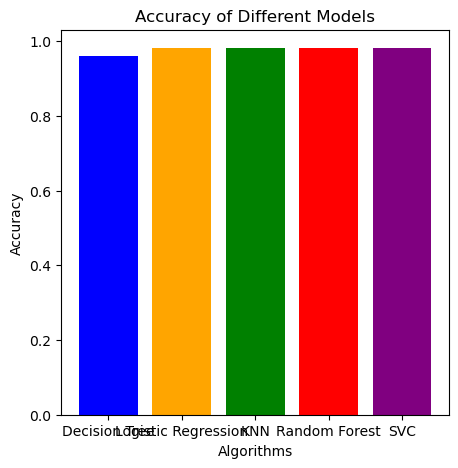

In [27]:
# Bar Plot for Model Accuracy Comparison
plt.bar(models.keys(), models.values(), color=['blue', 'orange', 'green', 'red', 'purple'])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.show()

In [28]:
# 7. Detailed Model Comparison: Train vs Test Scores

def compare_train_test_scores(model, X_train, y_train, X_test, y_test, model_name):
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print(f"{model_name} Training vs. Testing Scores:")
    print(f"Training Score: {train_score:.4f}")
    print(f"Testing Score: {test_score:.4f}")
    print(f"Difference: {train_score - test_score:.4f}\n")
    return train_score, test_score

train_scores, test_scores = [], []
model_names = []

for name, model in [('Logistic Regression', lr), ('KNN', knn), ('SVC', svc), ('Random Forest', rf), ('Decision Tree', dt)]:
    train_score, test_score = compare_train_test_scores(model, X_train_std, Y_train, X_test_std, Y_test, name)
    train_scores.append(train_score)
    test_scores.append(test_score)
    model_names.append(name)

Logistic Regression Training vs. Testing Scores:
Training Score: 0.9821
Testing Score: 0.9816
Difference: 0.0005

KNN Training vs. Testing Scores:
Training Score: 0.9822
Testing Score: 0.9811
Difference: 0.0011

SVC Training vs. Testing Scores:
Training Score: 0.9821
Testing Score: 0.9816
Difference: 0.0005

Random Forest Training vs. Testing Scores:
Training Score: 1.0000
Testing Score: 0.9815
Difference: 0.0185

Decision Tree Training vs. Testing Scores:
Training Score: 1.0000
Testing Score: 0.9607
Difference: 0.0393



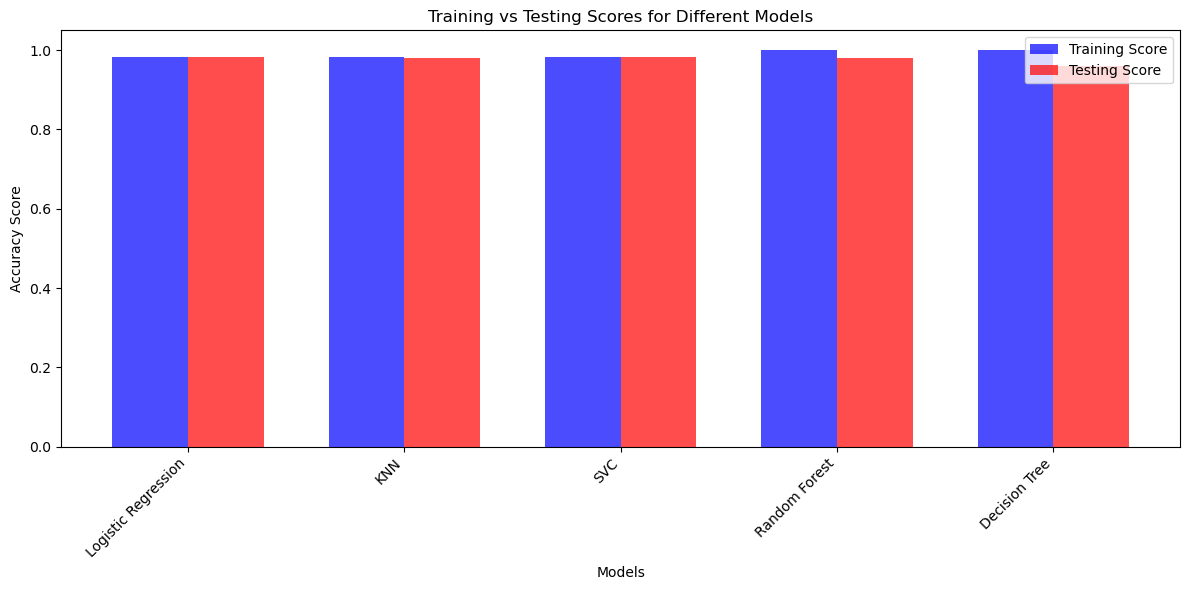

In [29]:
# Bar Plot to Compare Training and Testing Scores
plt.figure(figsize=(12, 6))
x = range(len(model_names))
width = 0.35

plt.bar([i - width/2 for i in x], train_scores, width, label='Training Score', color='blue', alpha=0.7)
plt.bar([i + width/2 for i in x], test_scores, width, label='Testing Score', color='red', alpha=0.7)

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Training vs Testing Scores for Different Models')
plt.xticks(x, model_names, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
# 6. Evaluation Metrics and Confusion Matrix
metrics = {
    'Model': [],
    'Accuracy': [],
    'F1 Score': [],
    'Recall': [],
    'Precision': [],
    'Confusion Matrix': []
}

for name, model in models.items():
    model.fit(X_train_std, Y_train)
    Y_pred = model.predict(X_test_std)
    
    accuracy = accuracy_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred, zero_division=1)
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy)
    metrics['F1 Score'].append(f1)
    metrics['Recall'].append(recall)
    metrics['Precision'].append(precision)
    metrics['Confusion Matrix'].append(conf_matrix)
    
    print(f"{name} Classification Report:\n{classification_report(Y_test, Y_pred, zero_division=1)}\n")

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      8520
           1       0.05      0.06      0.05       160

    accuracy                           0.96      8680
   macro avg       0.52      0.52      0.52      8680
weighted avg       0.97      0.96      0.96      8680


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8520
           1       1.00      0.00      0.00       160

    accuracy                           0.98      8680
   macro avg       0.99      0.50      0.50      8680
weighted avg       0.98      0.98      0.97      8680


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      8520
           1       0.17      0.01      0.01       160

    accuracy                           0.98      8680
   macro avg       

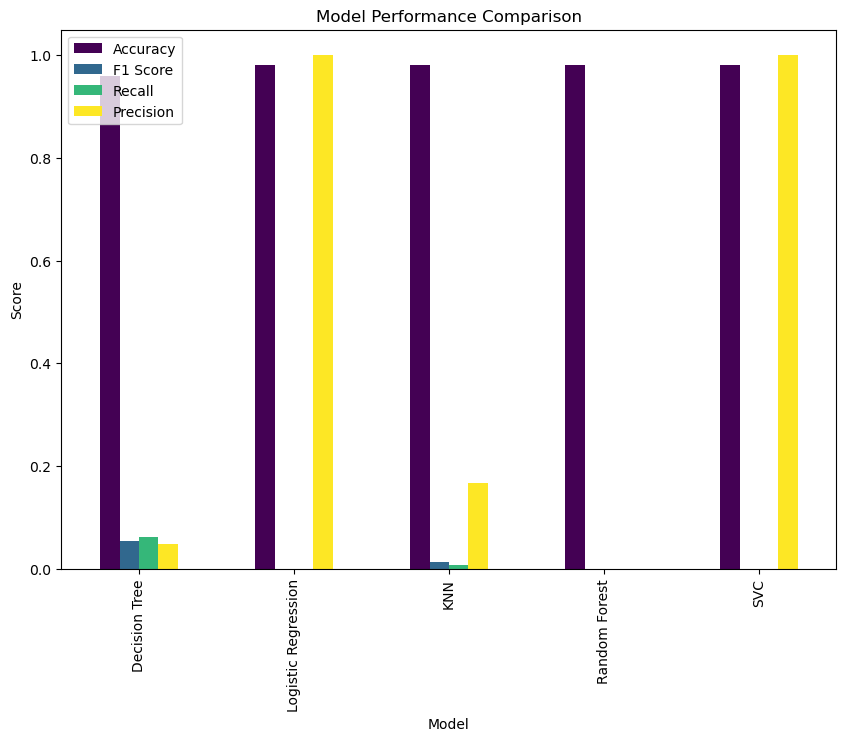

In [43]:
# Convert metrics to a DataFrame for easy visualization
metrics_df = pd.DataFrame(metrics)

# 7. Visualizing Model Performance

# Bar Plot for Accuracy, F1 Score, Recall, and Precision
metrics_df.set_index('Model', inplace=True)
metrics_df[['Accuracy', 'F1 Score', 'Recall', 'Precision']].plot(kind='bar', figsize=(10, 7), colormap='viridis')
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()

In [44]:
# Confusion Matrix Visualization
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

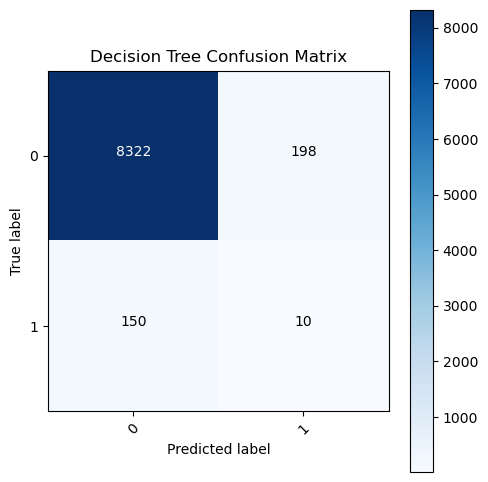

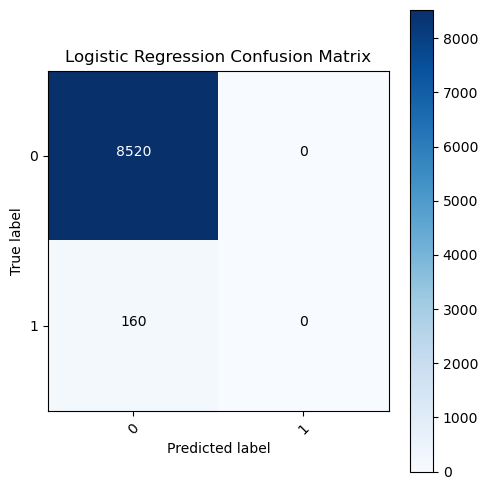

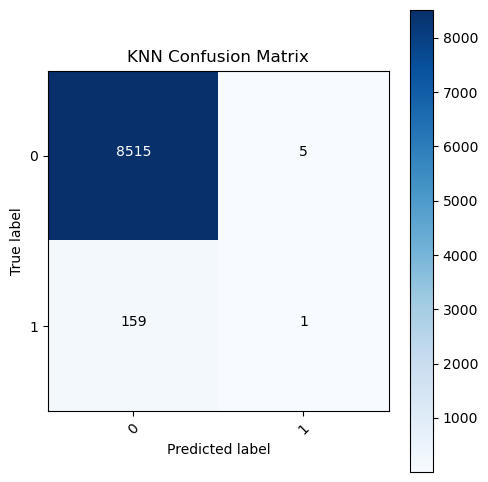

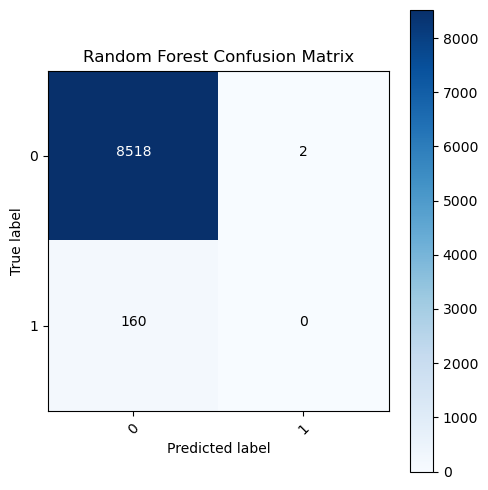

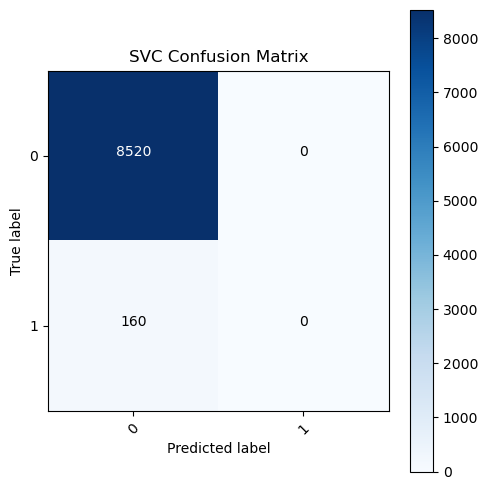

In [45]:
# Plot confusion matrix for each model
for name, conf_matrix in zip(metrics_df.index, metrics_df['Confusion Matrix']):
    plt.figure()
    plot_confusion_matrix(conf_matrix, classes=[0, 1], title=f'{name} Confusion Matrix')
    plt.show()

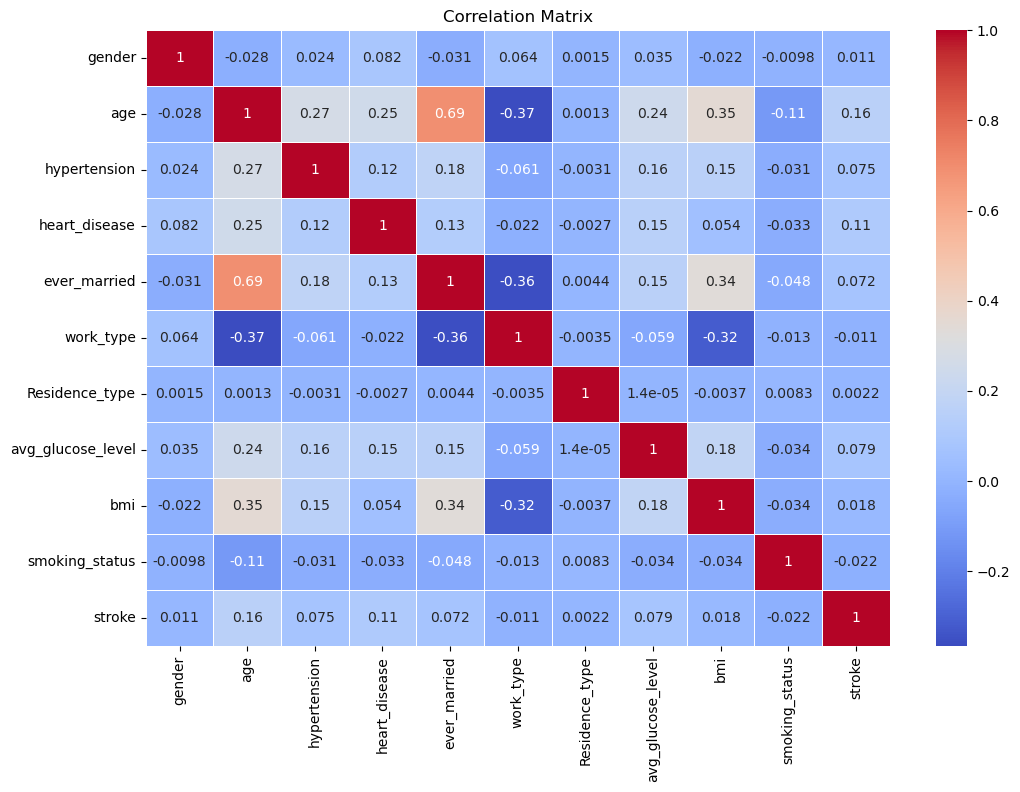

In [46]:
# 3. Correlation Matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()